coded by Muhammad Ayan Asif
22i-1097
DLP (CS-A) 

for Assignment 1 - Experimental Linear Regression Analysis of California Housing Dataset



PHASE 1

In [ ]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


california = fetch_california_housing()
x = california.data
y = california.target

feature_names = california.feature_names
print("Feature names:\n", feature_names)

target_names = california.target_names
print("Target names:\n", target_names)

for i, row in enumerate(x):   
    print({feature_names[j]: row[j] for j in range(len(feature_names))})



print(np.array(feature_names))


Feature names:
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target names:
 ['MedHouseVal']
{'MedInc': np.float64(8.3252), 'HouseAge': np.float64(41.0), 'AveRooms': np.float64(6.984126984126984), 'AveBedrms': np.float64(1.0238095238095237), 'Population': np.float64(322.0), 'AveOccup': np.float64(2.5555555555555554), 'Latitude': np.float64(37.88), 'Longitude': np.float64(-122.23)}
{'MedInc': np.float64(8.3014), 'HouseAge': np.float64(21.0), 'AveRooms': np.float64(6.238137082601054), 'AveBedrms': np.float64(0.9718804920913884), 'Population': np.float64(2401.0), 'AveOccup': np.float64(2.109841827768014), 'Latitude': np.float64(37.86), 'Longitude': np.float64(-122.22)}
{'MedInc': np.float64(7.2574), 'HouseAge': np.float64(52.0), 'AveRooms': np.float64(8.288135593220339), 'AveBedrms': np.float64(1.073446327683616), 'Population': np.float64(496.0), 'AveOccup': np.float64(2.8022598870056497), 'Latitude': np.float64(37.85), 'Longitude': np.

PHASE 2

MedInc: mean=3.871, median=3.535, min=0.500, max=15.000, std=1.900
HouseAge: mean=28.639, median=29.000, min=1.000, max=52.000, std=12.585
AveRooms: mean=5.429, median=5.229, min=0.846, max=141.909, std=2.474
AveBedrms: mean=1.097, median=1.049, min=0.333, max=34.067, std=0.474
Population: mean=1425.477, median=1166.000, min=3.000, max=35682.000, std=1132.435
AveOccup: mean=3.071, median=2.818, min=0.692, max=1243.333, std=10.386
Latitude: mean=35.632, median=34.260, min=32.540, max=41.950, std=2.136
Longitude: mean=-119.570, median=-118.490, min=-124.350, max=-114.310, std=2.003
MedInc: skewness=1.647
HouseAge: skewness=0.060
AveRooms: skewness=20.696
AveBedrms: skewness=31.315
Population: skewness=4.935
AveOccup: skewness=97.632
Latitude: skewness=0.466
Longitude: skewness=-0.298


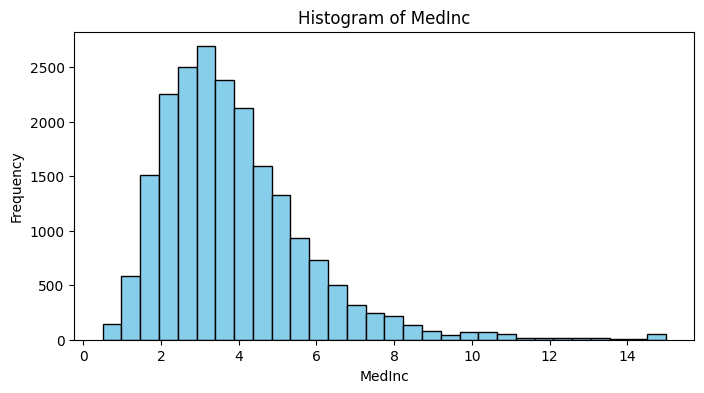

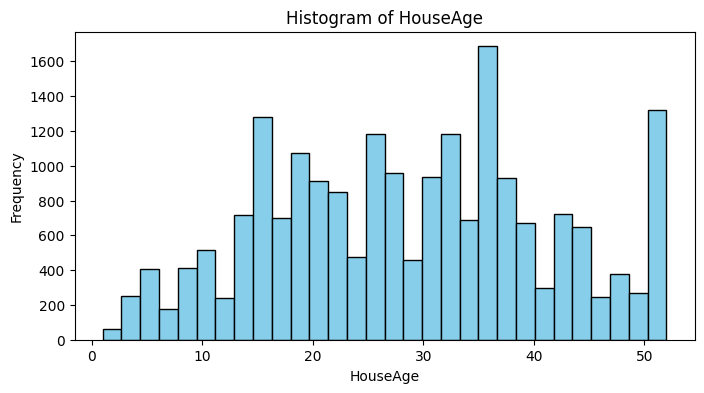

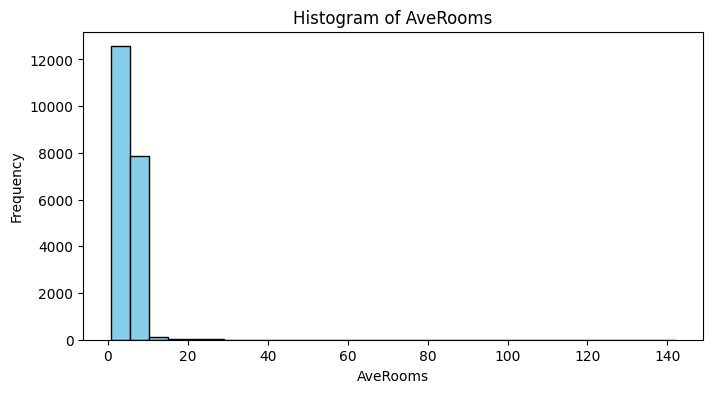

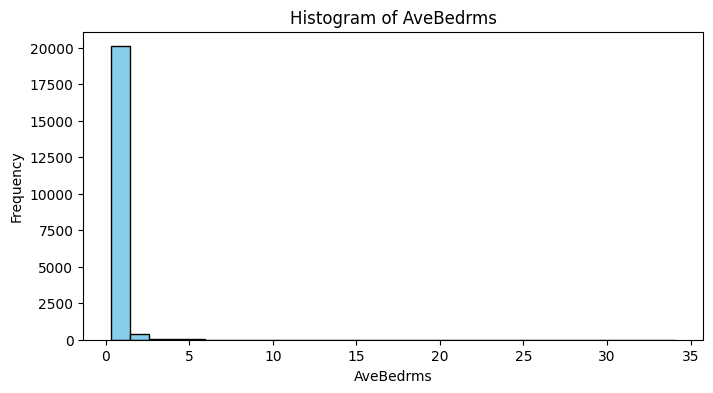

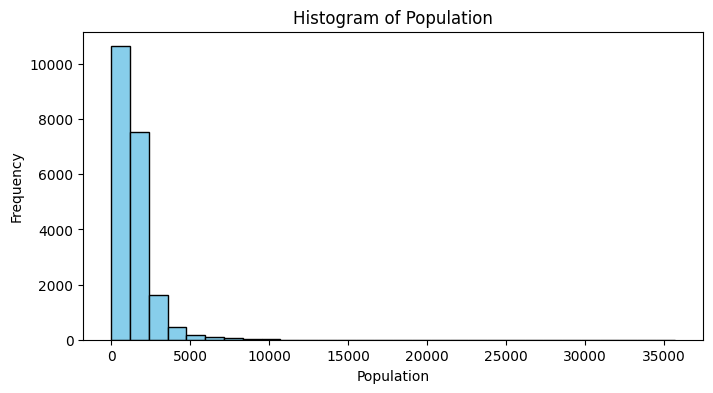

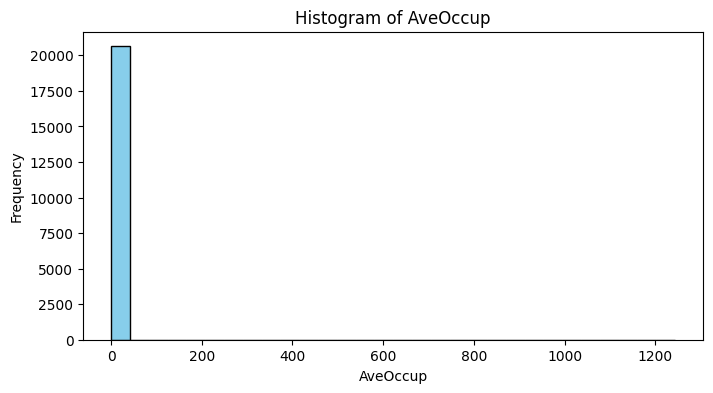

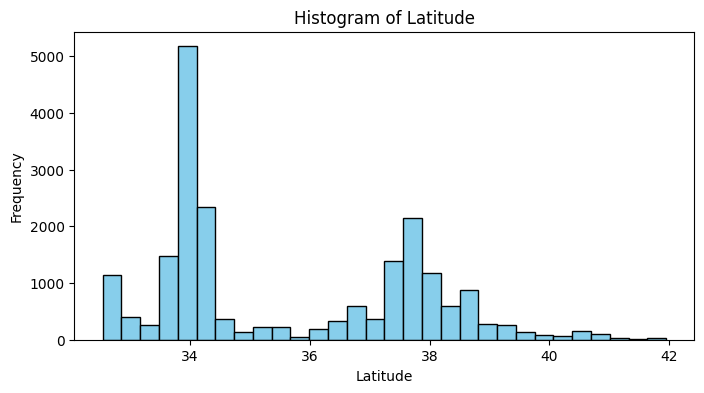

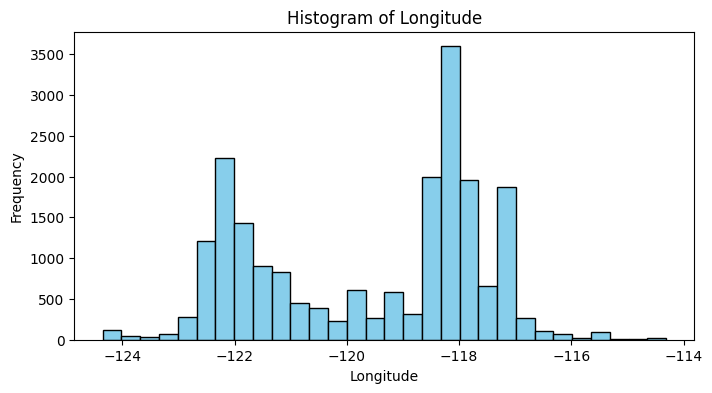

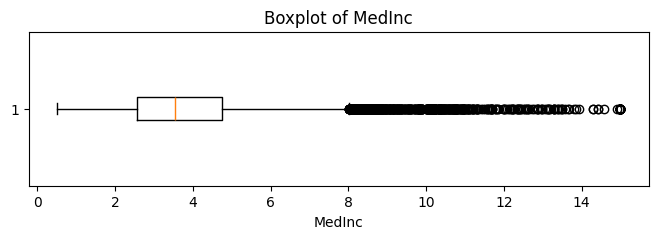

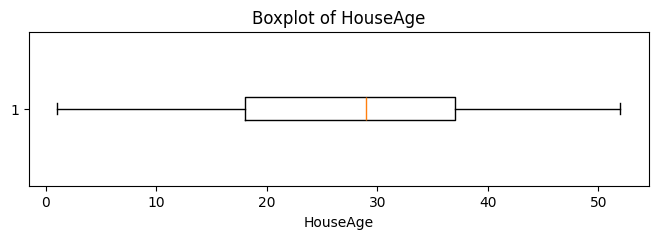

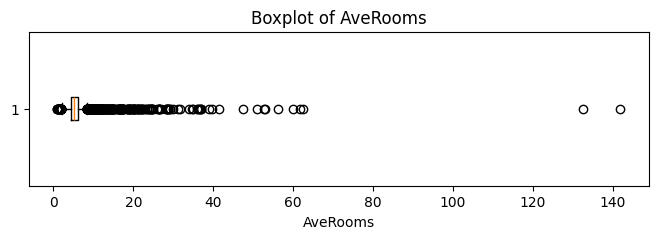

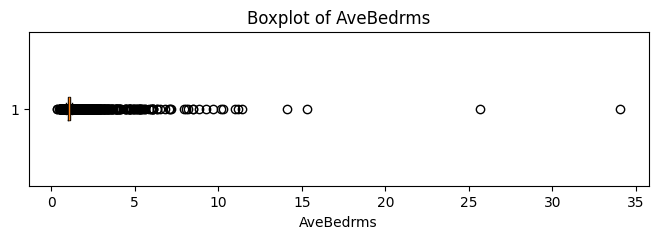

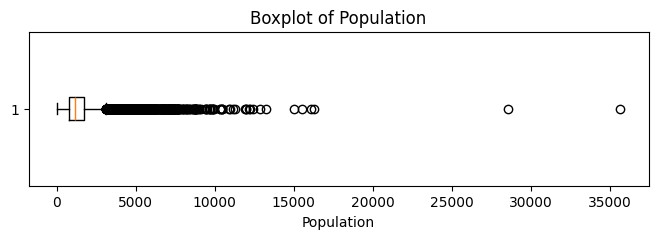

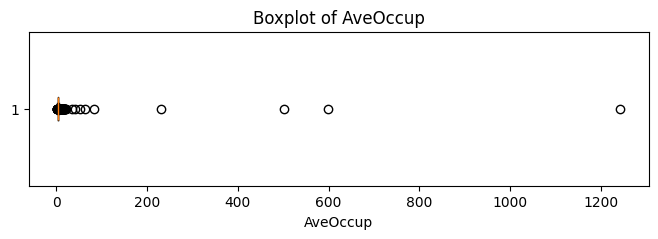

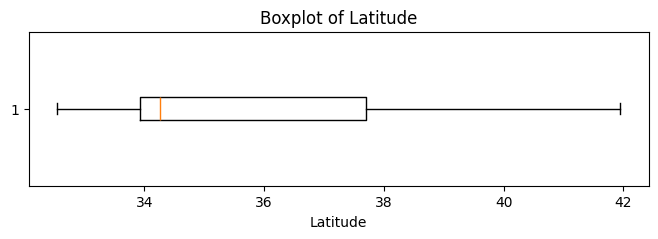

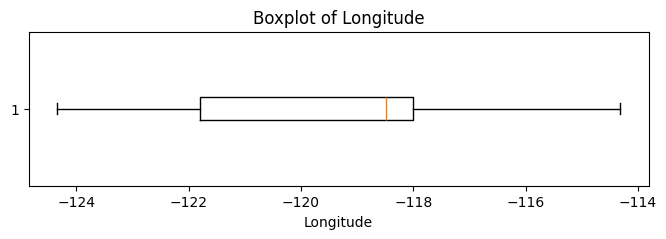

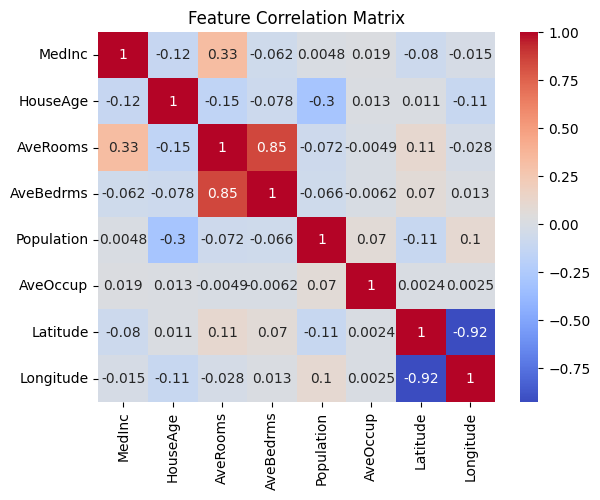

MedInc: 0.688
HouseAge: 0.106
AveRooms: 0.152
AveBedrms: -0.047
Population: -0.025
AveOccup: -0.024
Latitude: -0.144
Longitude: -0.046


In [27]:
for i, name in enumerate(feature_names):
    col = x[:, i]
    print(f"{name}: mean={np.mean(col):.3f}, median={np.median(col):.3f}, min={np.min(col):.3f}, max={np.max(col):.3f}, std={np.std(col):.3f}")

for i, name in enumerate(feature_names):
    col = x[:, i]
    print(f"{name}: skewness={skew(col):.3f}")


for i, name in enumerate(feature_names):
    col = x[:, i]
    plt.figure(figsize=(8,4))
    plt.hist(col, bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {name}")
    plt.xlabel(name)
    plt.ylabel("Frequency")
    plt.show()

for i, name in enumerate(feature_names):
    col = x[:, i]
    plt.figure(figsize=(8,2))
    plt.boxplot(col, vert=False)
    plt.title(f"Boxplot of {name}")
    plt.xlabel(name)
    plt.show()

correlationMatrix = np.corrcoef(x.T)
sns.heatmap(correlationMatrix, xticklabels=feature_names, yticklabels=feature_names, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

targetCorrelation = []
for i in range(x.shape[1]):
    corr = np.corrcoef(x[:, i], y)[0, 1]
    targetCorrelation.append(corr)

for name, corr in zip(feature_names, targetCorrelation):
    print(f"{name}: {corr:.3f}")


Question:

Yes, it is important as when two variables are correlated, their standard errors inflate. This means small changes in the data can produce greatly different coefficients.

PHASE 3

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def eval_metrics(yTrue, yPred):
    meanSquare = mean_squared_error(yTrue, yPred)
    meanAbsolute = mean_absolute_error(yTrue, yPred)
    r2 = r2_score(yTrue, yPred)
    rootMeanSquare = np.sqrt(meanSquare)
    return meanSquare, meanAbsolute, r2, rootMeanSquare


xMedInc = x[:, [0]]  #Single feature = Median Income
polyMedInc = PolynomialFeatures(degree=2, include_bias=False)
xMedIncPoly = polyMedInc.fit_transform(xMedInc)

regressionMedInc = LinearRegression().fit(xMedInc, y)
yPredRegressionMedInc = regressionMedInc.predict(xMedInc)

polyRegressionMedInc = LinearRegression().fit(xMedIncPoly, y)
yPredPolyRegressionMedInc = polyRegressionMedInc.predict(xMedIncPoly)

sgdMedInc = make_pipeline(StandardScaler(), SGDRegressor(max_iter=2000, tol=1e-4, random_state=42))
sgdMedInc.fit(xMedInc, y)
yPredSgdMedInc = sgdMedInc.predict(xMedInc)

sgdPolyMedInc = make_pipeline(StandardScaler(), SGDRegressor(max_iter=2000, tol=1e-4, random_state=42))
sgdPolyMedInc.fit(xMedIncPoly, y)
yPredSgdPolyMedInc = sgdPolyMedInc.predict(xMedIncPoly)


xMulti = x[:, :]  #All features

polyMulti2 = PolynomialFeatures(degree=2, include_bias=False)
xMulti = polyMulti2.fit_transform(xMulti)

polyMulti3 = PolynomialFeatures(degree=3, include_bias=False)
xMultiPoly3 = polyMulti3.fit_transform(xMulti)

regressionMulti = LinearRegression().fit(xMulti, y)
yPredRegressionMulti = regressionMulti.predict(xMulti)

polyRegressionMulti2 = LinearRegression().fit(xMulti, y)
yPredPolyRegressionMulti2 = polyRegressionMulti2.predict(xMulti)

polyRegressionMulti3 = LinearRegression().fit(xMultiPoly3, y)
yPredPolyRegressionMulti3 = polyRegressionMulti3.predict(xMultiPoly3)

sgdMulti = make_pipeline(StandardScaler(), SGDRegressor(max_iter=2000, tol=1e-4, random_state=42))
sgdMulti.fit(xMulti, y)
yPredSgdMulti = sgdMulti.predict(xMulti)

sgdPolyMulti2 = make_pipeline(StandardScaler(), SGDRegressor(max_iter=2000, tol=1e-4, random_state=42))
sgdPolyMulti2.fit(xMulti, y)
yPredSgdPolyMulti2 = sgdPolyMulti2.predict(xMulti)

sgdPolyMulti3 = make_pipeline(StandardScaler(), SGDRegressor(max_iter=2000, tol=1e-4, random_state=42))
sgdPolyMulti3.fit(xMultiPoly3, y)
yPredSgdPolyMulti3 = sgdPolyMulti3.predict(xMultiPoly3)



results = [
    ("Linear Regression (MedInc)", eval_metrics(y, yPredRegressionMedInc)),
    ("Polynomial Regression (MedInc, deg=2)", eval_metrics(y, yPredPolyRegressionMedInc)),
    ("SGD Regressor (MedInc)", eval_metrics(y, yPredSgdMedInc)),
    ("SGD Regressor (MedInc, deg=2)", eval_metrics(y, yPredSgdPolyMedInc)),

    ("Linear Regression (Multi)", eval_metrics(y, yPredRegressionMulti)),
    ("Polynomial Regression (Multi, deg=2)", eval_metrics(y, yPredPolyRegressionMulti2)),
    ("Polynomial Regression (Multi, deg=3)", eval_metrics(y, yPredPolyRegressionMulti3)),
    ("SGD Regressor (Multi)", eval_metrics(y, yPredSgdMulti)),
    ("SGD Regressor (Multi, deg=2)", eval_metrics(y, yPredSgdPolyMulti2)),
    ("SGD Regressor (Multi, deg=3)", eval_metrics(y, yPredSgdPolyMulti3)),
]

print("=== Phase 3: Regression Comparison ===")
print(f"{'Model':45s} {'MSE':>12s} {'MAE':>12s} {'R2':>12s} {'RMSE':>12s}")
for name, (mse, mae, r2, rmse) in results:
    print(f"{name:45s} {mse:12.4f} {mae:12.4f} {r2:12.4f} {rmse:12.4f}")


=== Phase 3: Regression Comparison ===
Model                                                  MSE          MAE           R2         RMSE
Linear Regression (MedInc)                          0.7011       0.6263       0.4734       0.8373
Polynomial Regression (MedInc, deg=2)               0.6950       0.6252       0.4780       0.8337
SGD Regressor (MedInc)                              0.7014       0.6252       0.4733       0.8375
SGD Regressor (MedInc, deg=2)                       0.6953       0.6243       0.4778       0.8339
Linear Regression (Multi)                           0.5243       0.5312       0.6062       0.7241
Polynomial Regression (Multi, deg=2)                0.4217       0.4614       0.6833       0.6494
Polynomial Regression (Multi, deg=3)                0.3613       0.4284       0.7287       0.6011
SGD Regressor (Multi)                             426.6888       1.7257    -319.4451      20.6564
SGD Regressor (Multi, deg=2)                  137464502849882606796800.0000 146

QUESTION:

 the polynomial terms show signs of overfitting, however as it hasnt been trained on a split, there is no way to confirm. 


QUESTION: Does using multiple features improve predictive accuracy compared to a single feature?

Single feature (MedInc):
Best R² ≈ 0.478 (Polynomial Regression deg=2).

Multiple features (all):
Best R² ≈ 0.729 (Polynomial Regression deg=3).

using multiple features improves predictive accuracy significantly (0.47 → 0.73 R²). That’s because Median Income alone explains some variance, but additional features (HouseAge, AveRooms, etc.) capture more complexity in housing prices.


QUESTION: Do engineered features reduce error, or do they increase the risk of overfitting?

Multi Linear Regression: R² ≈ 0.606.

Multi + Squares (deg=2): R² ≈ 0.683 (error reduced).

Multi + Cubes (deg=3): R² ≈ 0.729 (error reduced further).

On the training data, higher-degree polynomials reduce error and improve fit.


PHASE 4

=== Phase 4: Train/Test Comparison ===
Model                                   MSE          MAE           R2         RMSE
Linear Regression - Train            0.6930       0.6240       0.4816       0.8325
Linear Regression - Test             0.7033       0.6283       0.4633       0.8386
SGD Regressor - Train                0.6938       0.6296       0.4810       0.8330
SGD Regressor - Test                 0.7034       0.6339       0.4632       0.8387


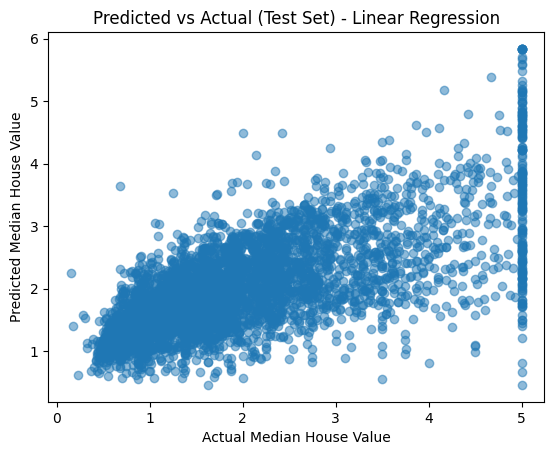

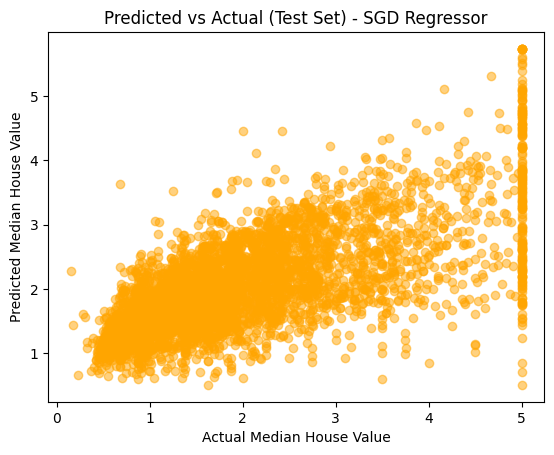

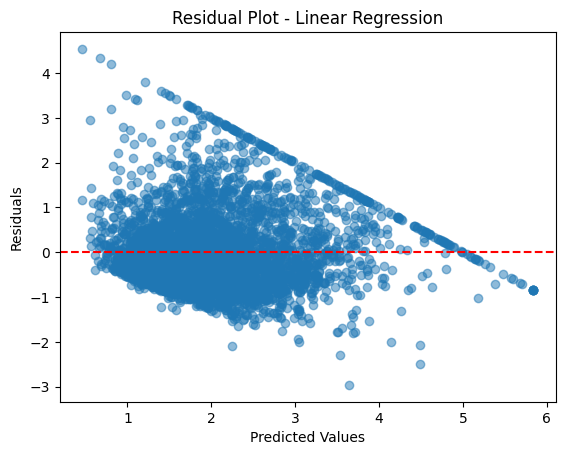

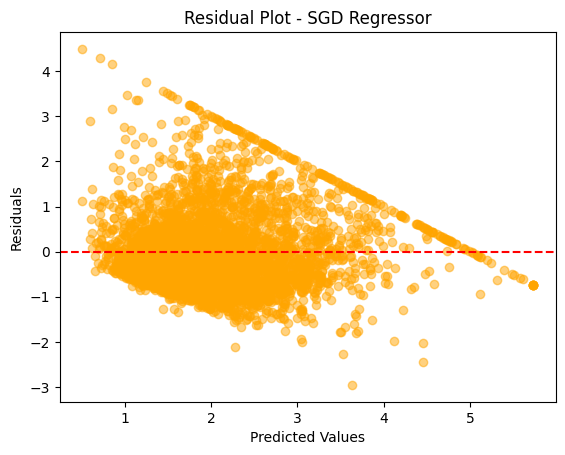

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

xTrain, xTest, yTrain, yTest = train_test_split(xMedIncPoly, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)

regressionTrain = LinearRegression().fit(xTrainScaled, yTrain)
yPredRegressionTrain = regressionTrain.predict(xTrainScaled)
yPredRegressionTest = regressionTrain.predict(xTestScaled)

sgdTrain = SGDRegressor(max_iter=2000, tol=1e-4, random_state=42).fit(xTrainScaled, yTrain)
yPredSgdTrain = sgdTrain.predict(xTrainScaled)
yPredSgdTest = sgdTrain.predict(xTestScaled)

results_phase4 = [
    ("Linear Regression - Train", eval_metrics(yTrain, yPredRegressionTrain)),
    ("Linear Regression - Test", eval_metrics(yTest, yPredRegressionTest)),
    ("SGD Regressor - Train", eval_metrics(yTrain, yPredSgdTrain)),
    ("SGD Regressor - Test", eval_metrics(yTest, yPredSgdTest)),
]

print("=== Phase 4: Train/Test Comparison ===")
print(f"{'Model':30s} {'MSE':>12s} {'MAE':>12s} {'R2':>12s} {'RMSE':>12s}")
for name, (mse, mae, r2, rmse) in results_phase4:
    print(f"{name:30s} {mse:12.4f} {mae:12.4f} {r2:12.4f} {rmse:12.4f}")

plt.scatter(yTest, yPredRegressionTest, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs Actual (Test Set) - Linear Regression")
plt.show()

plt.scatter(yTest, yPredSgdTest, alpha=0.5, color="orange")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs Actual (Test Set) - SGD Regressor")
plt.show()

residuals_lr = yTest - yPredRegressionTest
residuals_sgd = yTest - yPredSgdTest

plt.scatter(yPredRegressionTest, residuals_lr, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Linear Regression")
plt.show()

plt.scatter(yPredSgdTest, residuals_sgd, alpha=0.5, color="orange")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - SGD Regressor")
plt.show()


PHASE 5

=== Phase 5: 5-Fold Cross-Validation ===
Model                                 MSE             MAE              R2            RMSE
Linear Regression                  0.5306          0.5317          0.6014          0.7283
SGD Regressor                 251753.8714         23.9156    -187323.4656        296.5507


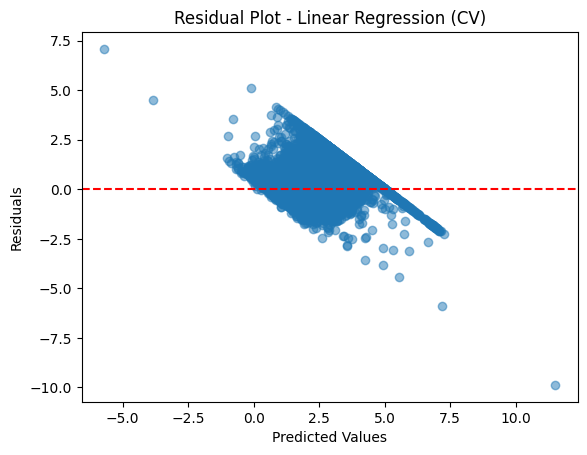

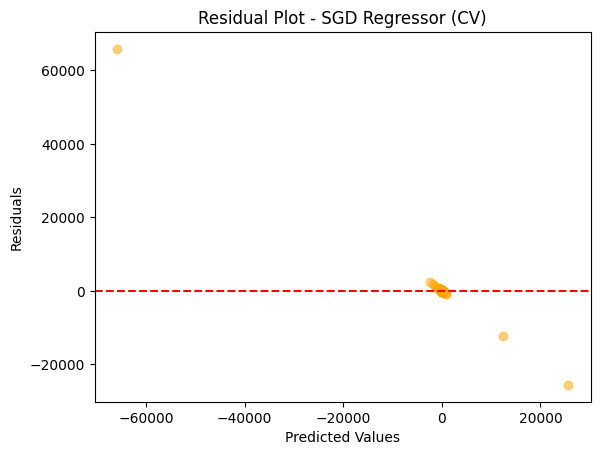

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer

mseScorer = make_scorer(mean_squared_error)
maeScorer = make_scorer(mean_absolute_error)
r2Scorer = make_scorer(r2_score)


cv = KFold(n_splits=5, shuffle=True, random_state=42)

mseScoresRegression = cross_val_score(regressionMedInc, xMulti, y, cv=cv, scoring=mseScorer)
maeScoresRegression = cross_val_score(regressionMedInc, xMulti, y, cv=cv, scoring=maeScorer)
r2ScoresRegression = cross_val_score(regressionMedInc, xMulti, y, cv=cv, scoring=r2Scorer)
rmseScoresRegression = np.sqrt(mseScoresRegression)

sgd = make_pipeline(StandardScaler(), SGDRegressor(max_iter=2000, tol=1e-4, random_state=42))
mseScoresSgd = cross_val_score(sgd, xMulti, y, cv=cv, scoring=mseScorer)
maeScoresSgd = cross_val_score(sgd, xMulti, y, cv=cv, scoring=maeScorer)
r2ScoresSgd = cross_val_score(sgd, xMulti, y, cv=cv, scoring=r2Scorer)
rmseScoresSgd = np.sqrt(mseScoresSgd)

print("=== Phase 5: 5-Fold Cross-Validation ===")
print(f"{'Model':25s} {'MSE':>15s} {'MAE':>15s} {'R2':>15s} {'RMSE':>15s}")
print(f"{'Linear Regression':25s} {mseScoresRegression.mean():15.4f} {maeScoresRegression.mean():15.4f} {r2ScoresRegression.mean():15.4f} {rmseScoresRegression.mean():15.4f}")
print(f"{'SGD Regressor':25s} {mseScoresSgd.mean():15.4f} {maeScoresSgd.mean():15.4f} {r2ScoresSgd.mean():15.4f} {rmseScoresSgd.mean():15.4f}")

yPredCV_lr = cross_val_predict(regressionMulti, xMulti, y, cv=cv)
yPredCV_sgd = cross_val_predict(sgd, xMulti, y, cv=cv)

residuals_lr = y - yPredCV_lr
residuals_sgd = y - yPredCV_sgd

plt.scatter(yPredCV_lr, residuals_lr, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Linear Regression (CV)")
plt.show()

plt.scatter(yPredCV_sgd, residuals_sgd, alpha=0.5, color="orange")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - SGD Regressor (CV)")
plt.show()
